### Visualización prueba de vecinos.

In [6]:
import matplotlib.pyplot as plt

def load_particles(filename):
    particles = []
    with open(filename, "r") as f:
        next(f)  # saltar cabecera
        for line in f:
            if line.strip() == "":
                continue
            parts = line.split()
            pid = int(parts[0])
            x, y = float(parts[1]), float(parts[2])
            particles.append((pid, x, y))
    return particles

def load_nn_output(filename="NN_test.output"):
    tests = []
    current = []
    with open(filename, "r") as f:
        for line in f:
            if line.strip() == "":
                if current:
                    tests.append(current)
                    current = []
                continue
            parts = line.split()
            pid = int(parts[0])
            x, y = float(parts[1]), float(parts[2])
            current.append((pid, x, y))
    if current:
        tests.append(current)
    return tests

#### Una sola prueba.

Se cargaron 608 partículas y 20 tests de vecinos

Test 0: Central -> ID 432, Pos=(-0.378, 0.005)
   Vecino -> ID 412, Pos=(-0.386, -0.003)
   Vecino -> ID 431, Pos=(-0.386, 0.005)
   Vecino -> ID 413, Pos=(-0.378, -0.003)
   Vecino -> ID 414, Pos=(-0.37, -0.003)
   Vecino -> ID 433, Pos=(-0.37, 0.005)
   Vecino -> ID 450, Pos=(-0.386, 0.013)
   Vecino -> ID 451, Pos=(-0.378, 0.013)
   Vecino -> ID 452, Pos=(-0.37, 0.013)

Test 1: Central -> ID 246, Pos=(-0.346, -0.075)
   Vecino -> ID 244, Pos=(-0.362, -0.075)
   Vecino -> ID 62, Pos=(-0.353535, -0.083333)
   Vecino -> ID 63, Pos=(-0.348485, -0.083333)
   Vecino -> ID 245, Pos=(-0.354, -0.075)
   Vecino -> ID 64, Pos=(-0.343434, -0.083333)
   Vecino -> ID 65, Pos=(-0.338384, -0.083333)
   Vecino -> ID 264, Pos=(-0.354, -0.067)
   Vecino -> ID 265, Pos=(-0.346, -0.067)
   Vecino -> ID 284, Pos=(-0.346, -0.059)

Test 2: Central -> ID 302, Pos=(-0.354, -0.051)
   Vecino -> ID 282, Pos=(-0.362, -0.059)
   Vecino -> ID 283, Pos=(-0.354, -0.

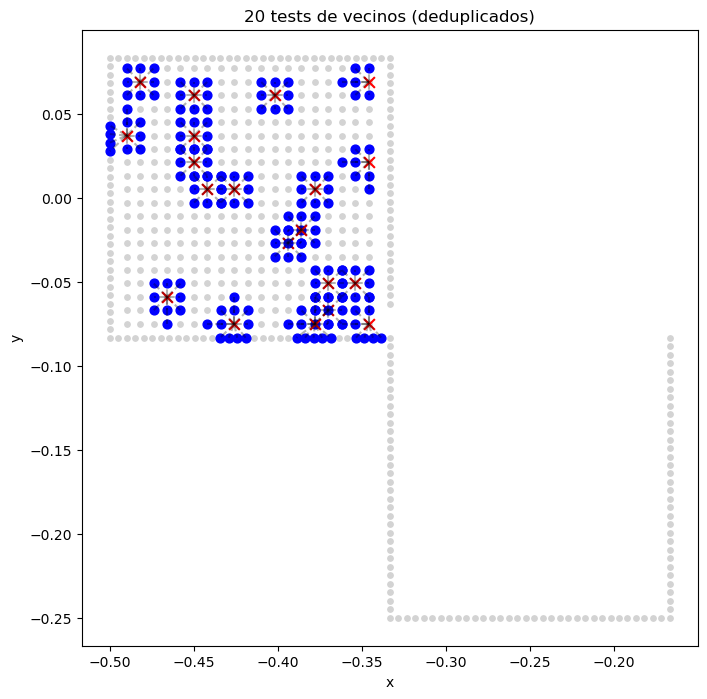

In [7]:


def plot_all_tests(particles, tests):
    xs = [p[1] for p in particles]
    ys = [p[2] for p in particles]
    plt.figure(figsize=(8,8))
    plt.scatter(xs, ys, c="lightgray", s=15, label="Todas las partículas")

    for i, test in enumerate(tests):
        if not test:
            continue
        central = test[0]
        neighbors = test[1:]

        # Eliminar duplicados
        seen = set()
        unique_neighbors = []
        for n in neighbors:
            if n[0] not in seen:
                unique_neighbors.append(n)
                seen.add(n[0])

        # 🔎 Imprimir info para verificar
        print(f"\nTest {i}: Central -> ID {central[0]}, Pos=({central[1]}, {central[2]})")
        for n in unique_neighbors:
            print(f"   Vecino -> ID {n[0]}, Pos=({n[1]}, {n[2]})")

        # Central en rojo
        plt.scatter(central[1], central[2], c="red", s=60, marker="x")

        # Vecinos en azul
        nx = [n[1] for n in unique_neighbors]
        ny = [n[2] for n in unique_neighbors]
        plt.scatter(nx, ny, c="blue", s=40)

        # Líneas desde central a cada vecino
        for n in unique_neighbors:
            plt.plot([central[1], n[1]], [central[2], n[2]], "k--", alpha=0.3)

    plt.gca().set_aspect("equal", "box")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{len(tests)} tests de vecinos (deduplicados)")
    plt.show()

if __name__ == "__main__":
    particles = load_particles("../data/salpicadura_vaciado_llenado.txt")
    tests = load_nn_output("../test_results/NN_after_h_update.output")
    print(f"Se cargaron {len(particles)} partículas y {len(tests)} tests de vecinos")
    plot_all_tests(particles, tests)


#### Visualización antes y después de modificar h.

In [8]:
def compare_all_tests(before_file, after_file, particles_file, nTests=20):
    particles = load_particles(particles_file)
    tests_before = load_nn_output(before_file)
    tests_after  = load_nn_output(after_file)

    n = min(nTests, len(tests_before), len(tests_after))
    print(f"Mostrando {n} comparaciones (antes vs después)")

    for i in range(n):
        test_b = tests_before[i]
        test_a = tests_after[i]

        central_b, neighbors_b = test_b[0], test_b[1:]
        central_a, neighbors_a = test_a[0], test_a[1:]

        # Filtrar duplicados
        seen_b, neighbors_b_unique = set(), []
        for nbh in neighbors_b:
            if nbh[0] not in seen_b:
                neighbors_b_unique.append(nbh)
                seen_b.add(nbh[0])

        seen_a, neighbors_a_unique = set(), []
        for nbh in neighbors_a:
            if nbh[0] not in seen_a:
                neighbors_a_unique.append(nbh)
                seen_a.add(nbh[0])

        # Crear figura con dos subplots (lado a lado)
        fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

        for ax, neighbors, title in zip(
            axes,
            [neighbors_b_unique, neighbors_a_unique],
            ["Antes (h inicial)", "Después (h adaptado)"]
        ):
            # Fondo: todas las partículas en gris
            xs = [p[1] for p in particles]
            ys = [p[2] for p in particles]
            ax.scatter(xs, ys, c="lightgray", s=15)

            # Partícula central en rojo
            ax.scatter(central_b[1], central_b[2], c="red", s=60, marker="x", label="Central")

            # Vecinos en azul
            nx = [n[1] for n in neighbors]
            ny = [n[2] for n in neighbors]
            ax.scatter(nx, ny, c="blue", s=40, label="Vecinos")

            # Conexiones con líneas punteadas
            for n in neighbors:
                ax.plot([central_b[1], n[1]], [central_b[2], n[2]], "k--", alpha=0.3)

            ax.set_aspect("equal", "box")
            ax.set_title(f"{title}\nTest {i}, ID central={central_b[0]} ({len(neighbors)} vecinos)")

        plt.tight_layout()
        plt.show()


Mostrando 20 comparaciones (antes vs después)


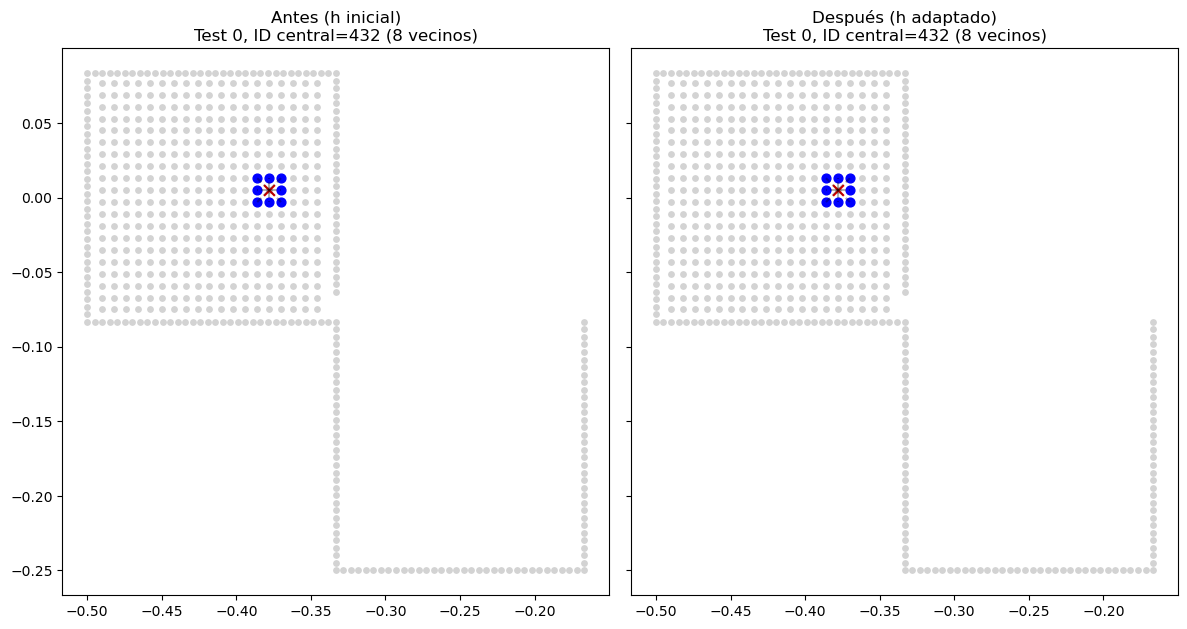

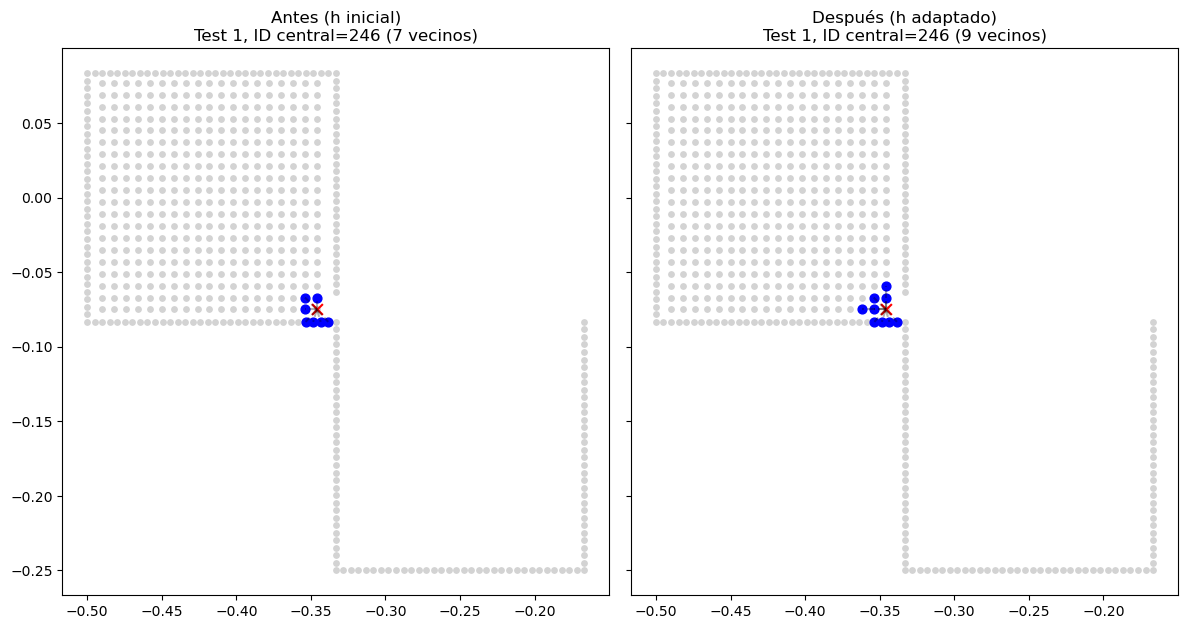

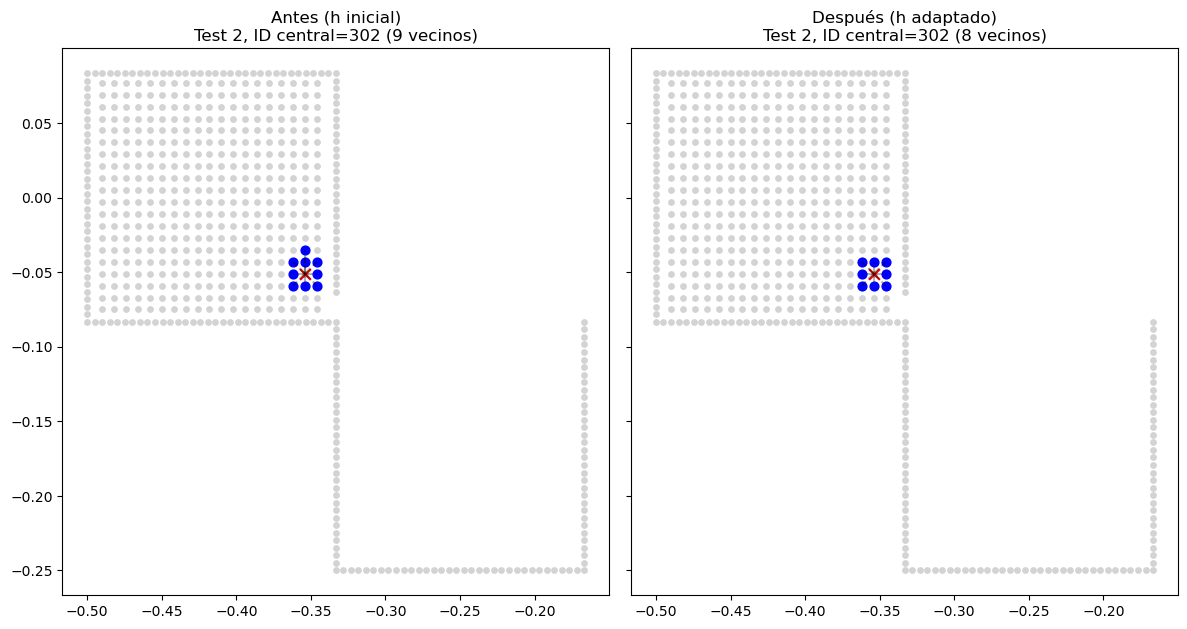

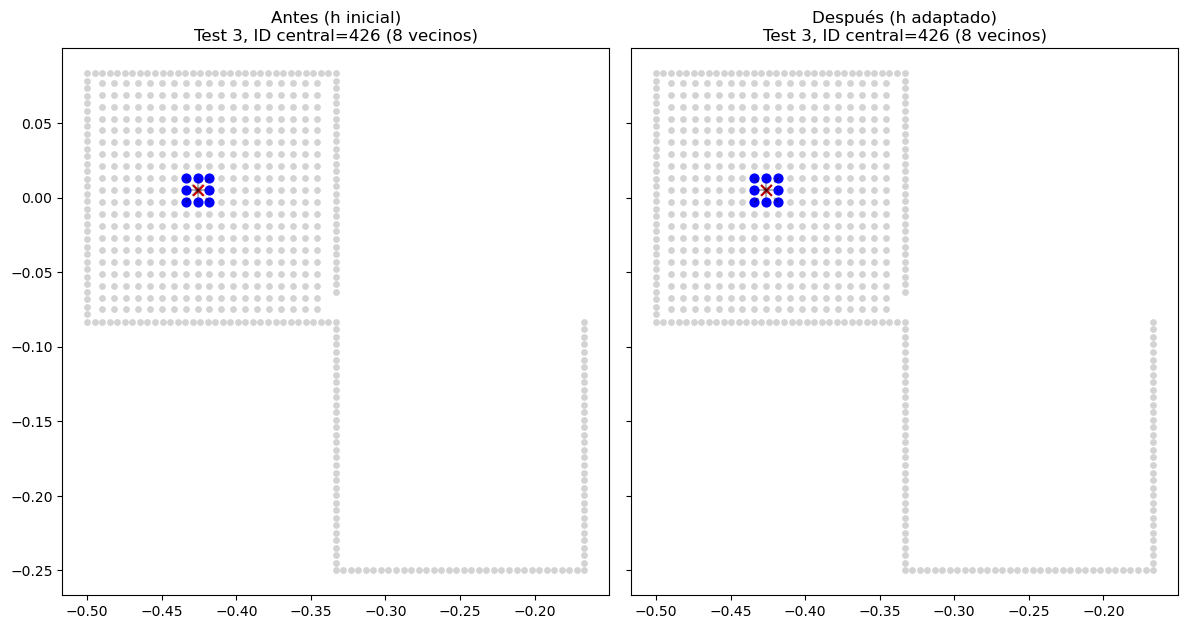

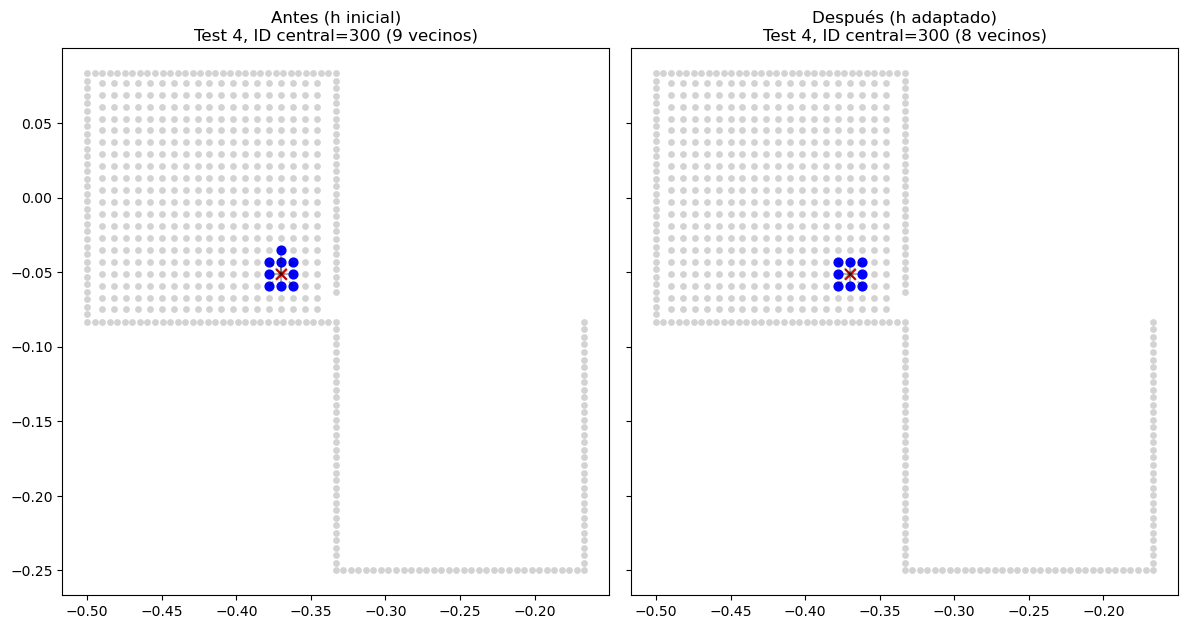

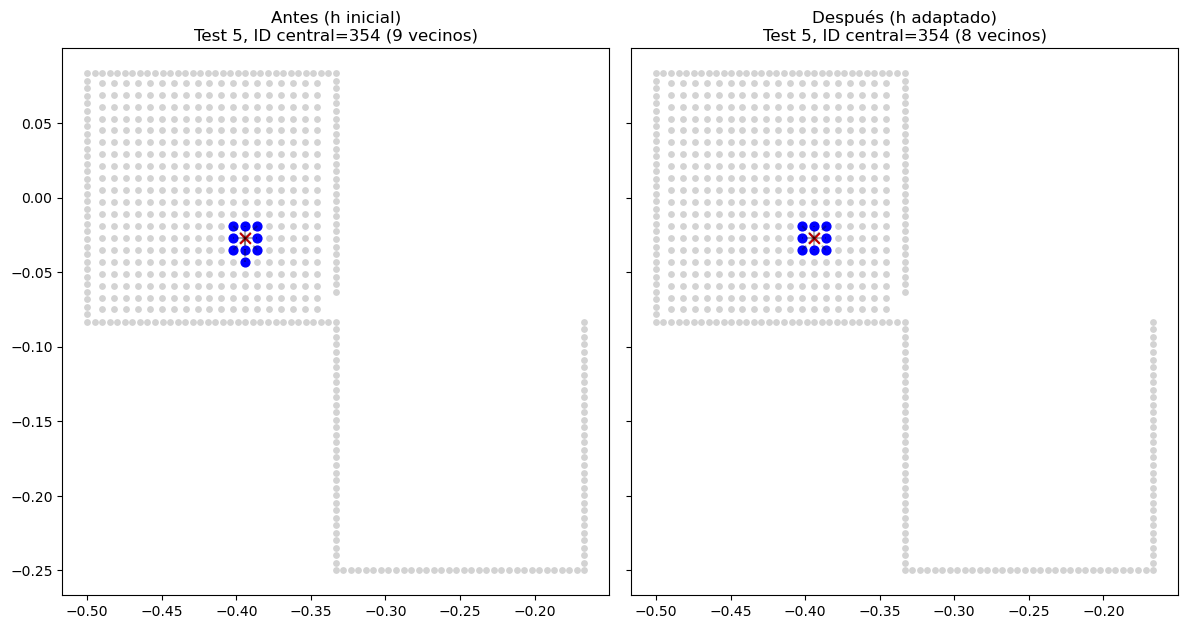

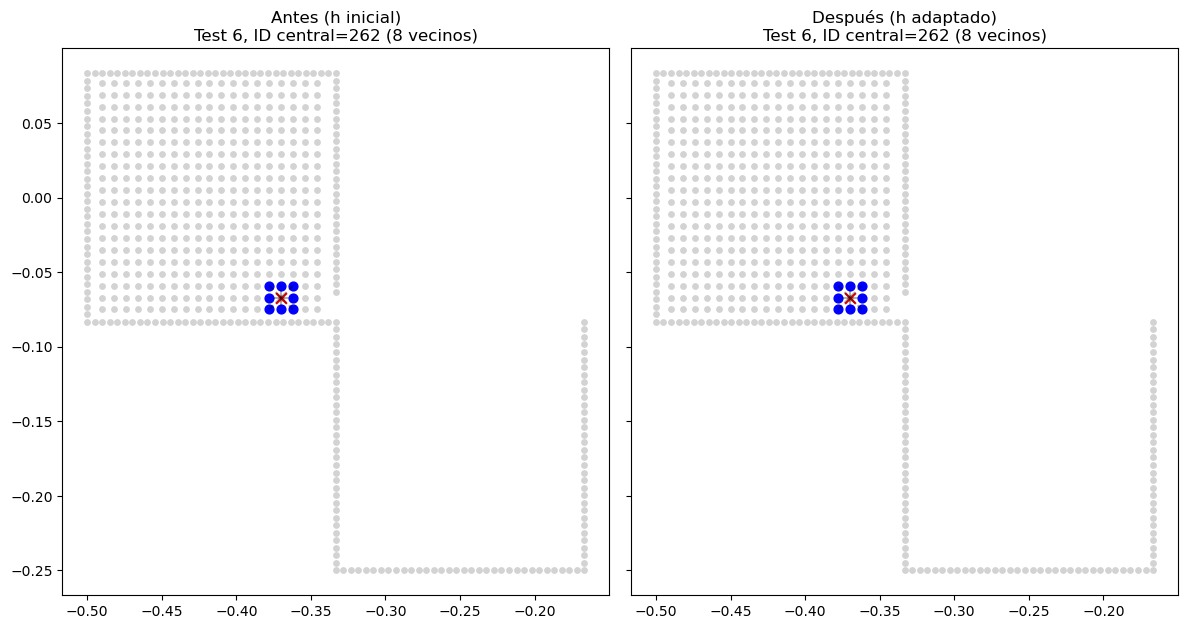

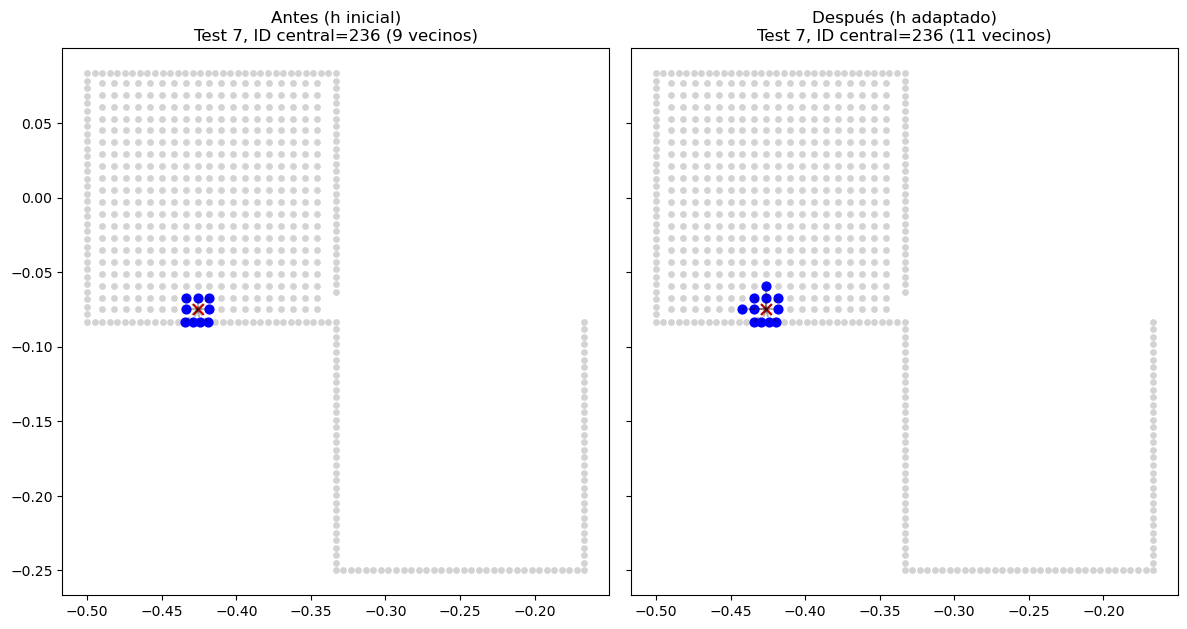

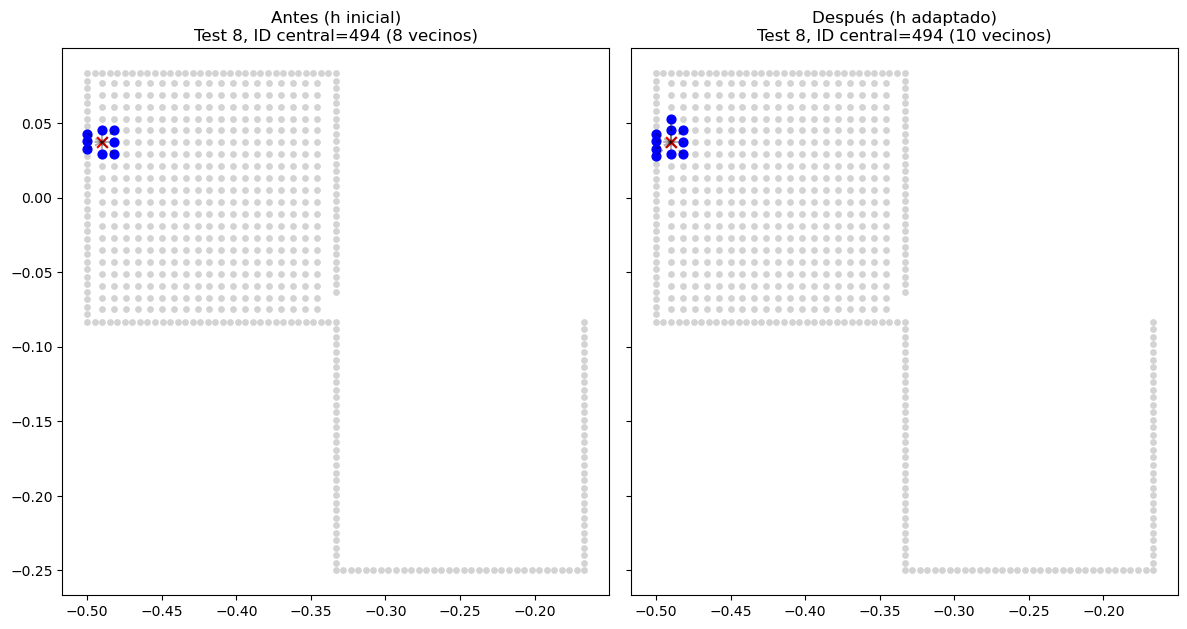

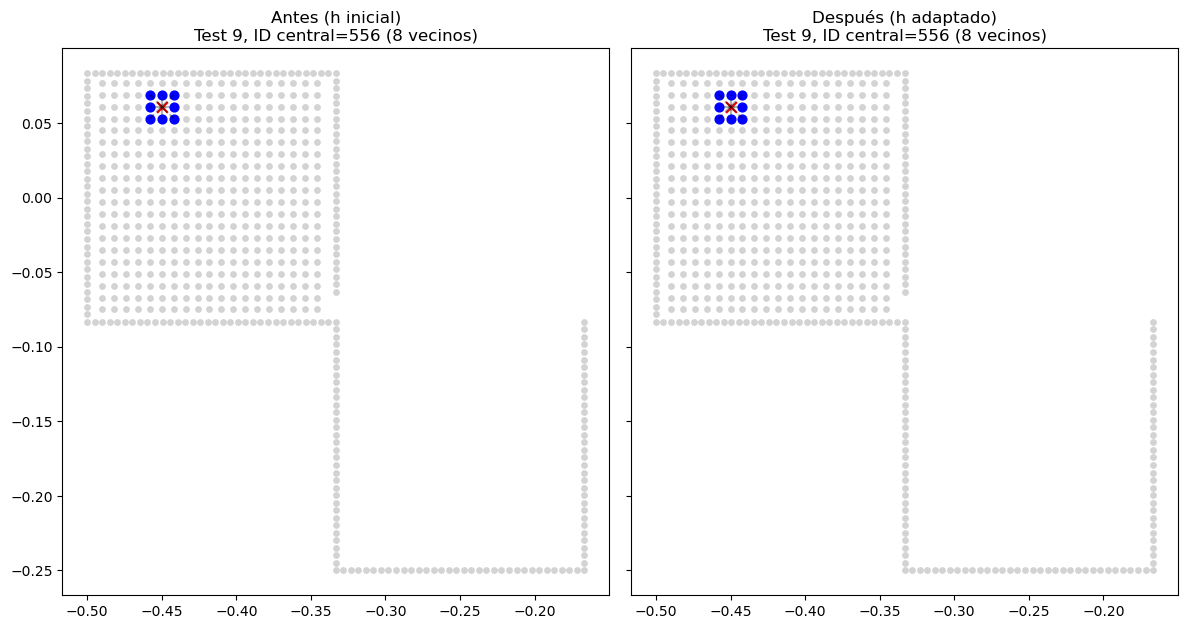

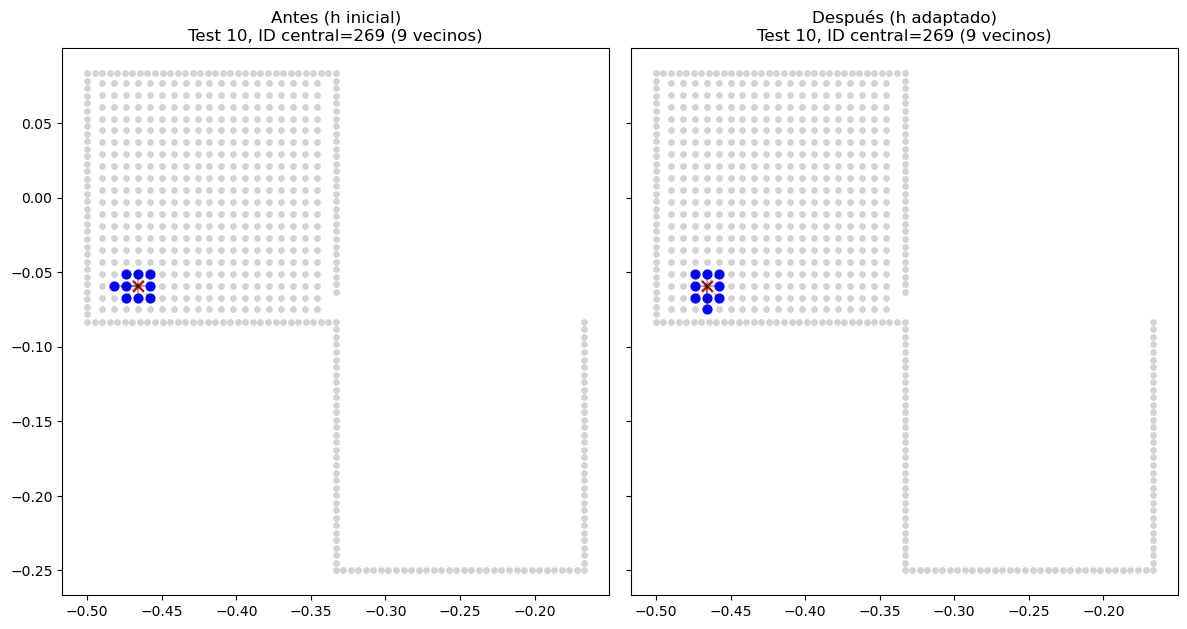

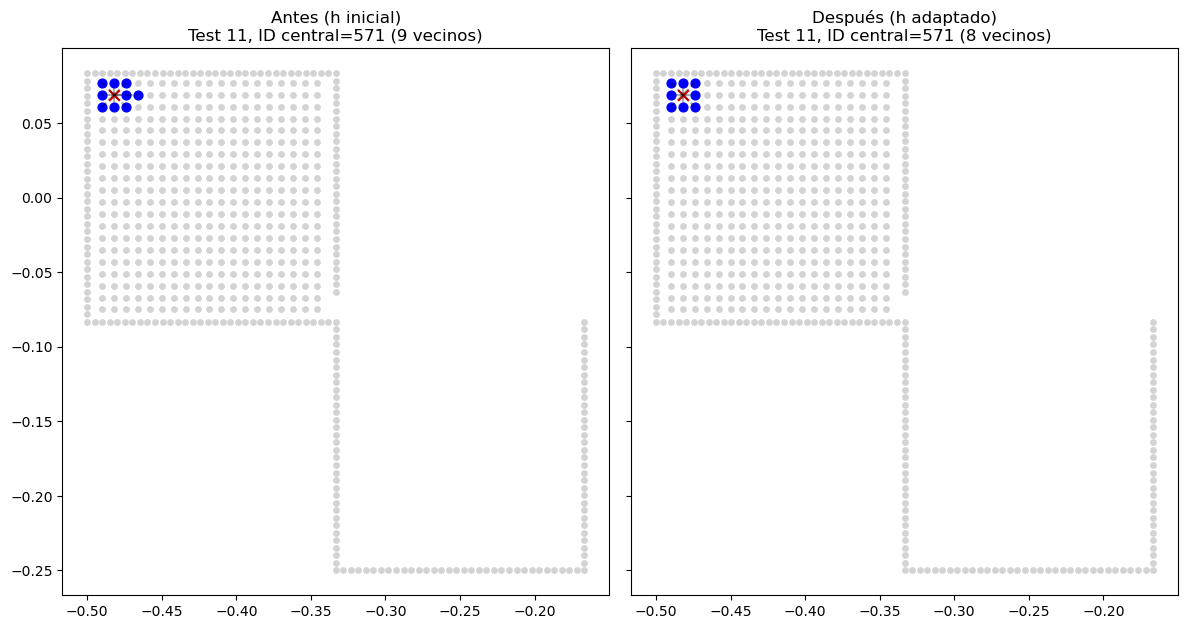

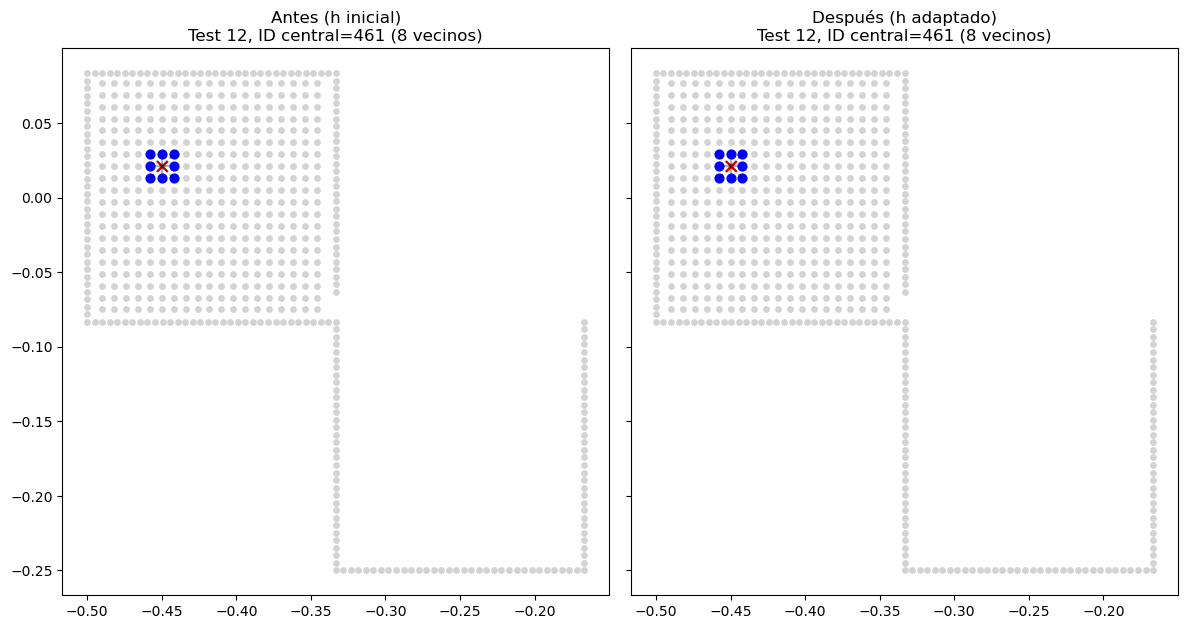

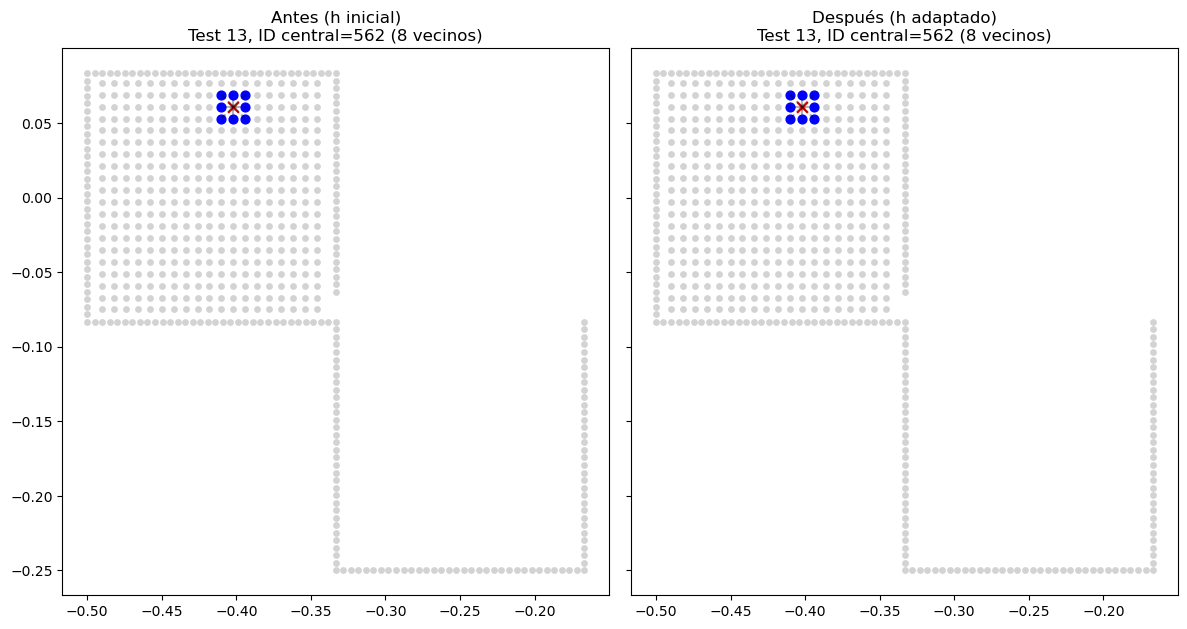

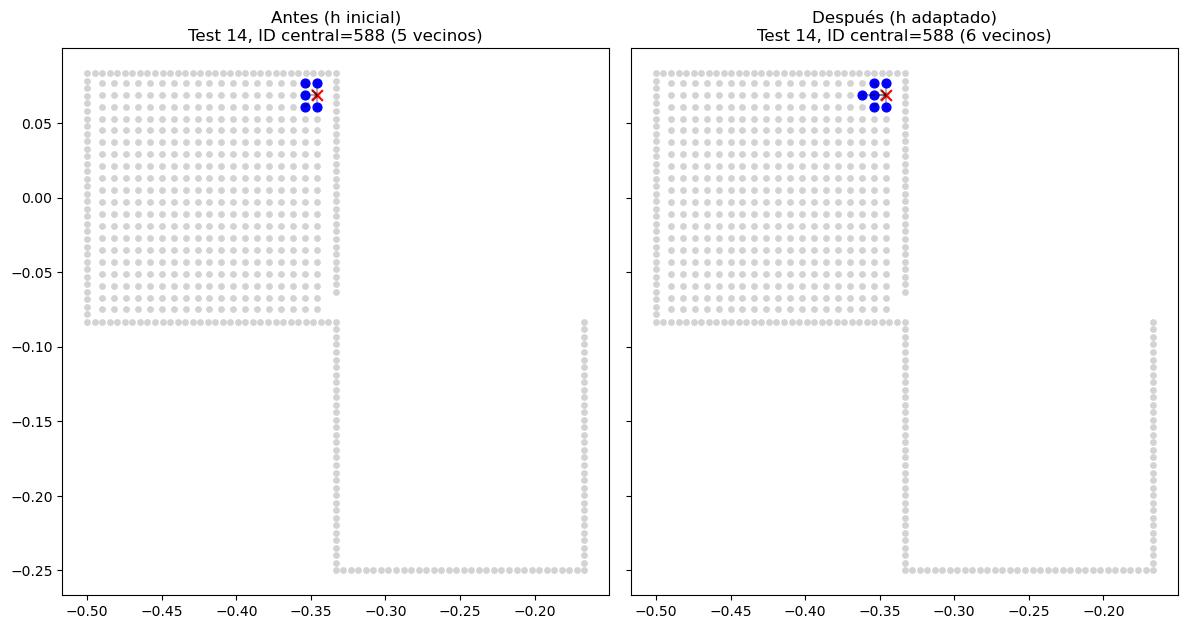

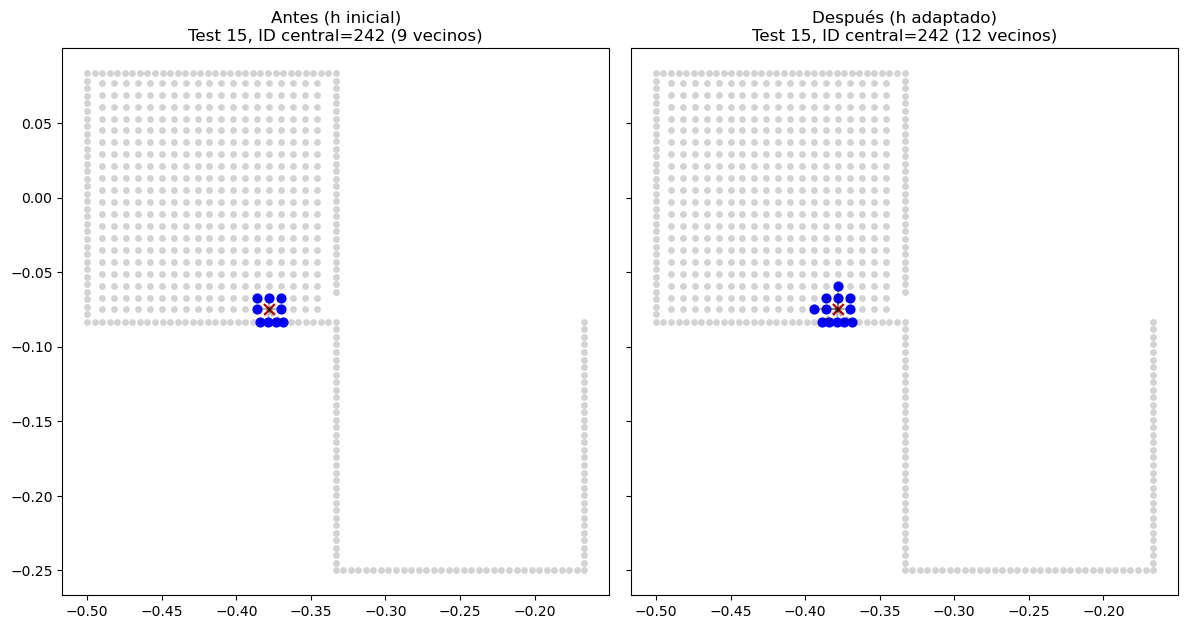

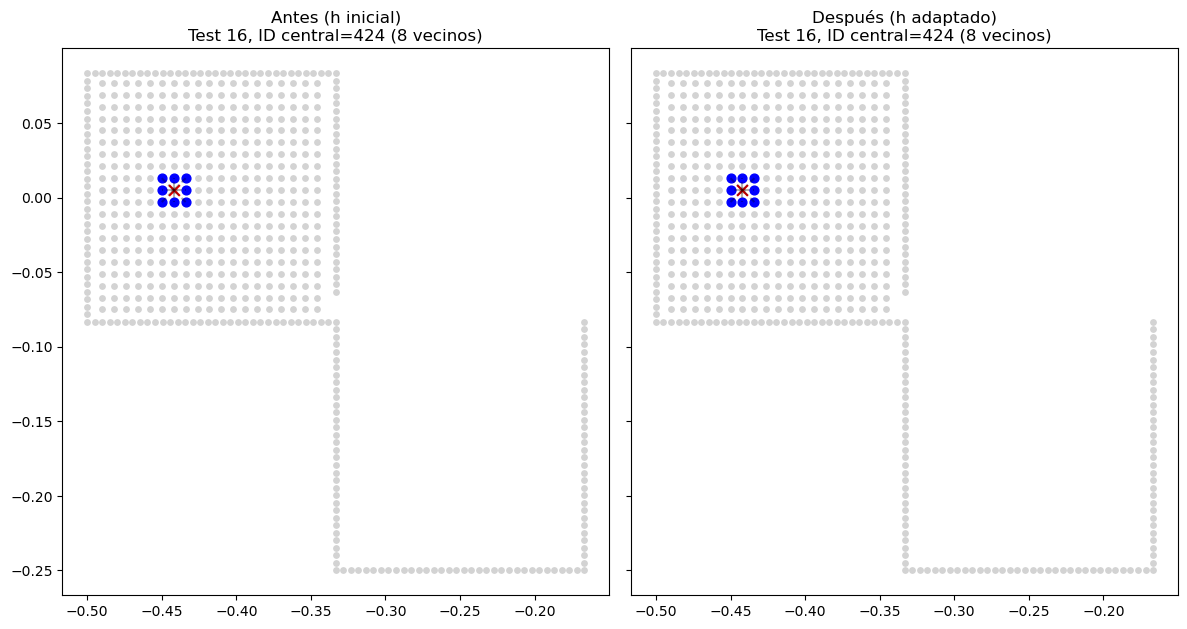

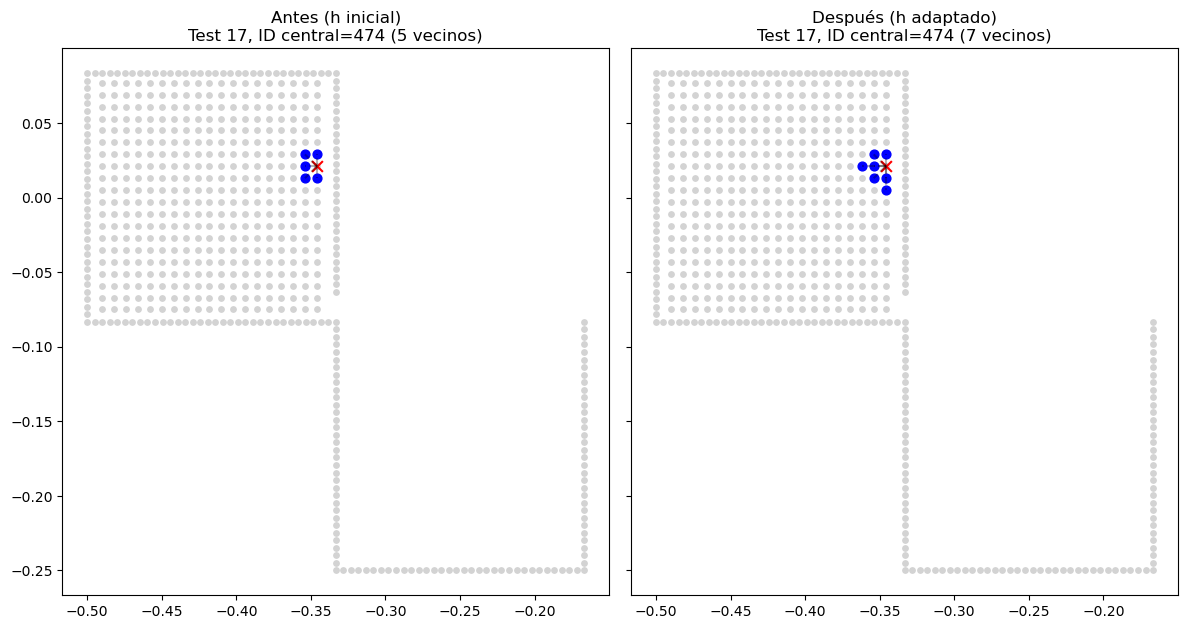

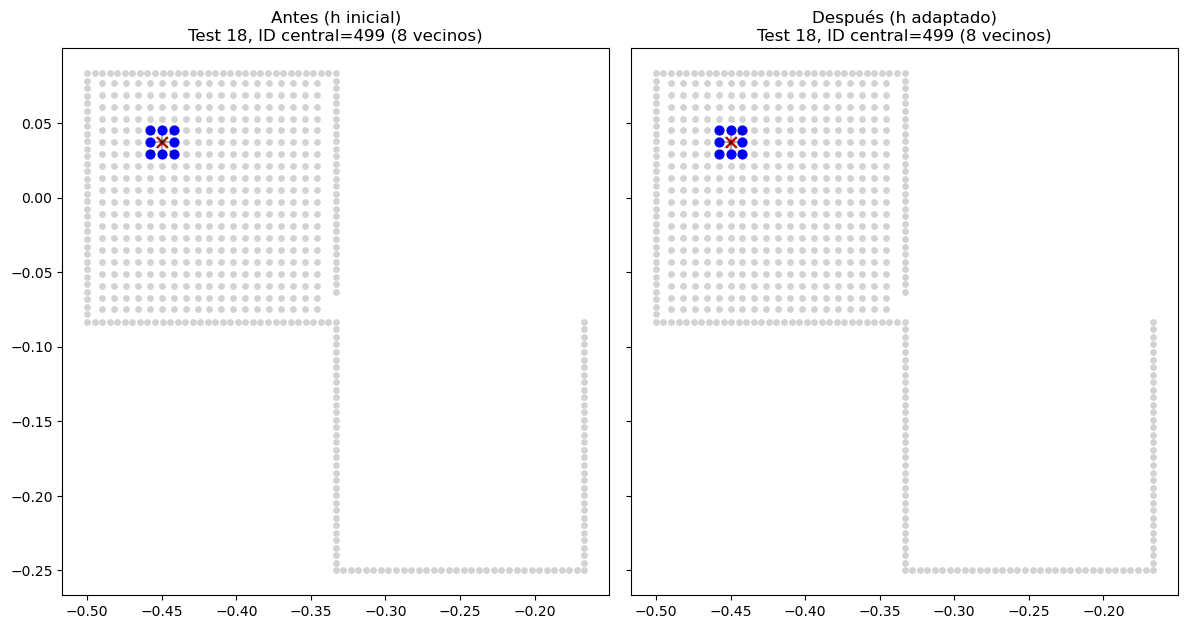

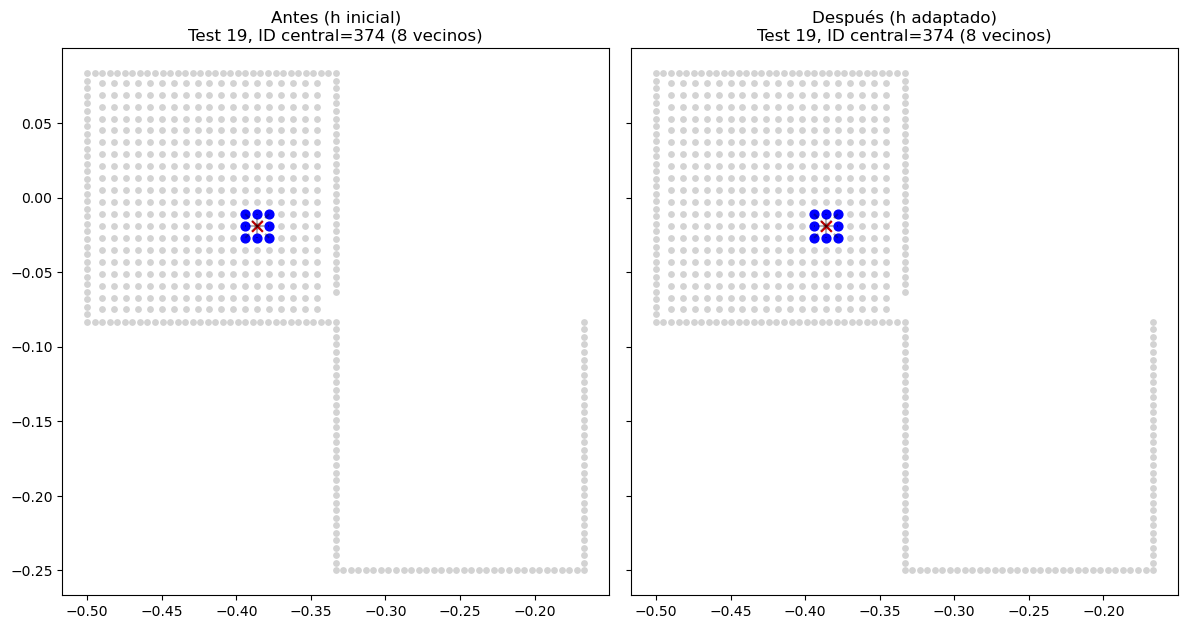

In [9]:
if __name__ == "__main__":
    compare_all_tests(
        "../test_results/NN_before_h_update.output",
        "../test_results/NN_after_h_update.output",
        "../data/salpicadura_vaciado_llenado.txt",
        nTests=20
    )
